In [60]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
from tensorflow.keras.losses import sparse_categorical_crossentropy
if K.common.image_dim_ordering()=='tensorflow':
    K.set_image_dim_ordering("th")
from tensorflow.keras.optimizers import Adam
# Import Tensorflow with multiprocessing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [88]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [23]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
for i in range(50000):
    if y_train[i]==0 or y_train[i]==1 or y_train[i]==8 or y_train[i]==9:
        y_train[i]=0
    else:
        y_train[i]=1

In [26]:
y_train.size

50000

In [27]:
y_train.shape

(50000, 1)

In [28]:
y_train 
#label haie train 0-->vehicles 1-->animals

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [29]:
y_test.size

10000

In [30]:
y_test.shape

(10000, 1)

In [31]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [32]:
for c in range(10000):
    if y_test[c]==0 or y_test[c]==1 or y_test[c]==8 or y_test[c]==9:
        y_test[c]=0
    else:
        y_test[c]=1

In [33]:
y_test.size

10000

In [34]:
y_test.shape

(10000, 1)

In [35]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [57]:
classes = ('vehicle' , 'animal')

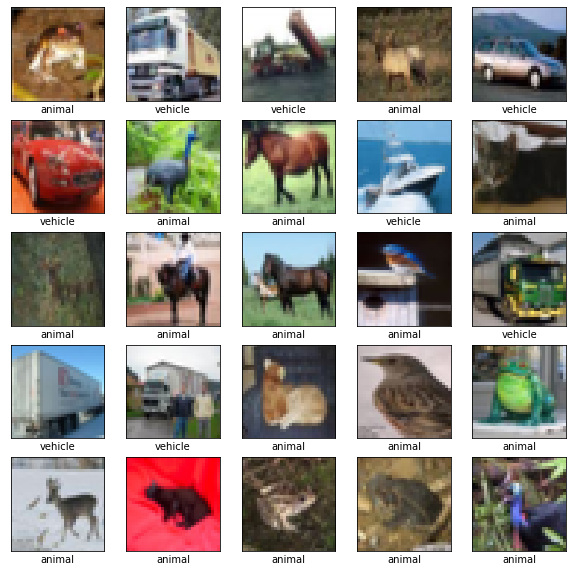

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i][0]])
plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [62]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [64]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.4552 - acc: 0.8579 - val_loss: 0.2797 - val_acc: 0.8867
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.2634 - acc: 0.8946 - val_loss: 0.2423 - val_acc: 0.8994
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.2430 - acc: 0.9042 - val_loss: 0.2353 - val_acc: 0.9073
Epoch 4/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.2245 - acc: 0.9119 - val_loss: 0.2217 - val_acc: 0.9132
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.2137 - acc: 0.9156 - val_loss: 0.2154 - val_acc: 0.9130
Epoch 6/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.1988 - acc: 0.9214 - val_loss: 0.2058 - val_acc: 0.9160
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.1847 - acc: 0.9269 - val_loss: 0.

10000/10000 - 3s - loss: 0.2190 - acc: 0.9242


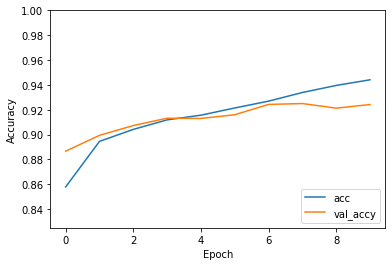

In [80]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_accy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.825, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [151]:
class1 = ('airplane' , 'car' , 'ship', 'truck')

In [152]:
#vehicle_train

In [153]:
x_train_vehicles=[]
y_train_vehicles=[]

In [154]:
for i in range(50000):
    if y_train1[i]==0 or y_train1[i]==1 or y_train1[i]==8 or y_train1[i]==9:
        y_train_vehicles.append(y_train1[i])
        x_train_vehicles.append(x_train1[i,::])

In [166]:
y_train_vehicles= np.asarray(y_train_vehicles)
x_train_vehicles= np.asarray(x_train_vehicles)

In [167]:
y_train_vehicles.shape

(20000, 1)

In [206]:
for w in range(20000):
    if y_train_vehicles[w]==0:
        y_train_vehicles[w]=0
        
                
    if y_train_vehicles[w]==1:
        y_train_vehicles[w]=1
        
        
    if y_train_vehicles[w]==8:
        y_train_vehicles[w]=2
        
    if y_train_vehicles[w]==9:
        y_train_vehicles[w]=3
    
    


In [207]:
#vehicle_test

In [218]:
x_test_vehicles=[]
y_test_vehicles=[]

In [219]:
for c in range(10000):
    if y_test1[c]==0 or y_test1[c]==1 or y_test1[c]==8 or y_test1[c]==9:
        y_test_vehicles.append(y_test1[c])
        x_test_vehicles.append(x_test1[c,::])

In [220]:
y_test_vehicles= np.asarray(y_test_vehicles)
x_test_vehicles= np.asarray(x_test_vehicles)

In [252]:
b=0
for c in range(10000):
    if y_test1[c]==0 or y_test1[c]==1 or y_test1[c]==8 or y_test1[c]==9:
        b=b+1
b 

for v in range(4000):
    if y_test_vehicles[v]==0:
        y_test_vehicles[v]=0
        
                
    if y_test_vehicles[v]==1:
        y_test_vehicles[v]=1
        
        
    if y_test_vehicles[v]==8:
        y_test_vehicles[v]=2
        
    if y_test_vehicles[v]==9:
        y_test_vehicles[v]=3

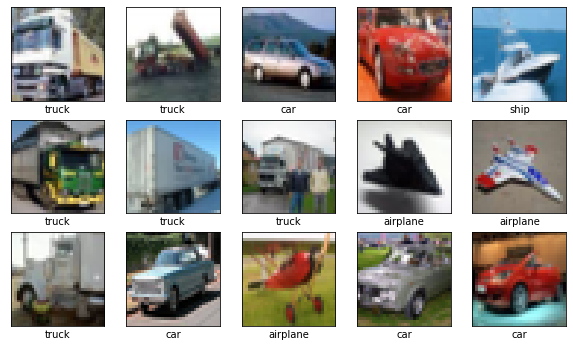

In [222]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_vehicles[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class1[y_train_vehicles[i][0]])
plt.show()

In [223]:
#train

In [224]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [225]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10))

In [226]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1.fit(x_train_vehicles, y_train_vehicles, epochs=10, 
                    validation_data=(x_test_vehicles, y_test_vehicles))

Train on 20000 samples, validate on 4000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 1.3091 - acc: 0.5354 - val_loss: 0.9385 - val_acc: 0.5965
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.8173 - acc: 0.6700 - val_loss: 0.7920 - val_acc: 0.6820
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.6990 - acc: 0.7258 - val_loss: 0.6880 - val_acc: 0.7203
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.6095 - acc: 0.7636 - val_loss: 0.6051 - val_acc: 0.7685
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.5352 - acc: 0.7982 - val_loss: 0.6244 - val_acc: 0.7700
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.4767 - acc: 0.8223 - val_loss: 0.5531 - val_acc: 0.8010
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.4330 - acc: 0.8421 - val_loss: 0.5

4000/4000 - 1s - loss: 109.3780 - acc: 0.2240


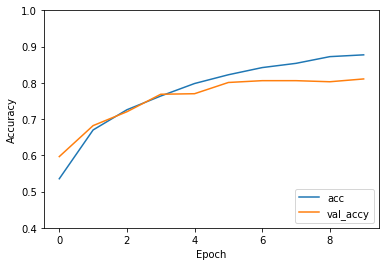

In [229]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_accy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test_vehicles,  y_test_vehicles, verbose=2)

In [ ]:
#animal_train

In [230]:
class2=('bird', 'cat', 'deer', 'dog', 'frog', 'horse')

In [255]:
x_train_animals=[]
y_train_animals=[]

In [256]:
for i in range(50000):
    if y_train1[i]==2 or y_train1[i]==3 or y_train1[i]==4 or y_train1[i]==5 or y_train1[i]==6 or y_train1[i]==7:
        y_train_animals.append(y_train[i])
        x_train_animals.append(x_train[i,::])

In [257]:
y_train_animals= np.asarray(y_train_animals)
x_train_animals= np.asarray(x_train_animals)

In [258]:
for v in range(30000):
    if y_train_animals[v]==2:
        y_train_animals[v]=0
        
                
    if y_train_animals[v]==3:
        y_train_animals[v]=1
        
        
    if y_train_animals[v]==4:
        y_train_animals[v]=2
        
    if y_train_animals[v]==5:
        y_train_animals[v]=3
        
    if y_train_animals[v]==6:
        y_train_animals[v]=4
        
    if y_train_animals[v]==7:
        y_train_animals[v]=5

In [259]:
#animal_test

In [260]:
x_test_animals=[]
y_test_animals=[]

In [261]:
for i in range(10000):
    if y_test1[i]==2 or y_test1[i]==3 or y_test1[i]==4 or y_test1[i]==5 or y_test1[i]==6 or y_test1[i]==7:
        y_test_animals.append(y_test1[i])
        x_test_animals.append(x_test1[i,::])

In [262]:
y_test_animals= np.asarray(y_test_animals)
x_test_animals= np.asarray(x_test_animals)

In [263]:
for w in range(6000):
    if y_test_animals[w]==2:
        y_test_animals[w]=0
        
                
    if y_test_animals[w]==3:
        y_test_animals[w]=1
        
        
    if y_test_animals[w]==4:
        y_test_animals[w]=2
        
    if y_test_animals[w]==5:
        y_test_animals[w]=3
        
    if y_test_animals[w]==6:
        y_test_animals[w]=4
        
    if y_test_animals[w]==7:
        y_test_animals[w]=5

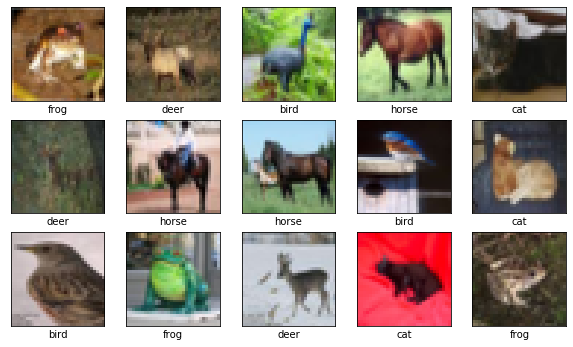

In [264]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_animals[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class2[y_train_animals[i][0]])
plt.show()

In [265]:
#train

In [266]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [267]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [268]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(x_train_animals, y_train_animals, epochs=10, 
                    validation_data=(x_test_animals, y_test_animals))

Train on 30000 samples, validate on 6000 samples
Epoch 1/10
30000/30000 [==============================] - 40s 1ms/sample - loss: 1.7545 - acc: 0.4059 - val_loss: 1.3067 - val_acc: 0.4890
Epoch 2/10
30000/30000 [==============================] - 40s 1ms/sample - loss: 1.2455 - acc: 0.5175 - val_loss: 1.2224 - val_acc: 0.5340
Epoch 3/10
30000/30000 [==============================] - 44s 1ms/sample - loss: 1.1313 - acc: 0.5708 - val_loss: 1.1284 - val_acc: 0.5805
Epoch 4/10
30000/30000 [==============================] - 40s 1ms/sample - loss: 1.0481 - acc: 0.6069 - val_loss: 1.1300 - val_acc: 0.5710
Epoch 5/10
30000/30000 [==============================] - 41s 1ms/sample - loss: 0.9746 - acc: 0.6370 - val_loss: 1.0660 - val_acc: 0.6122
Epoch 6/10
30000/30000 [==============================] - 43s 1ms/sample - loss: 0.9249 - acc: 0.6573 - val_loss: 1.1380 - val_acc: 0.5915
Epoch 7/10
30000/30000 [==============================] - 41s 1ms/sample - loss: 0.8604 - acc: 0.6825 - val_loss: 1.0

6000/6000 - 2s - loss: 57.8534 - acc: 0.1725


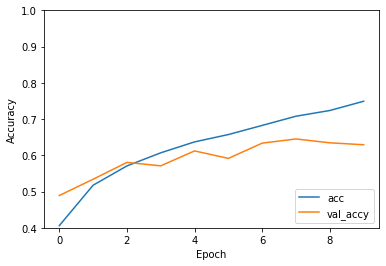

In [269]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_accy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test_animals,  y_test_animals, verbose=2)